In [2]:
%conda install -c conda-forge arm_pyart -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [160]:
import numpy as np

In [161]:
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import netCDF4
import pyart
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy

In [162]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/ERUO-main/examples/Subset_MRR/2023/Subset/subset-mrr.nc')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [163]:
ds

<xarray.Dataset>
Dimensions:                 (time: 360, range: 256, sweep: 1, n_spectra: 256, spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-05-19T13:00:00.0065610...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           (time) int32 dask.array<chunksize=(360,), meta=np.ndarray>
    time_coverage_start     (time) |S128 dask.array<chunksize=(360,), meta=np.ndarray>
    time_coverage_end       (time) |S128 dask.array<chunksize=(360,), meta=np.ndarray>
    time_reference          (time) |S128 dask.array<chunksize=(360,), meta=np.ndarray>
    instrument_type         (time) |S128 dask.array<chunksize=(360,), meta=np.ndarray>
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


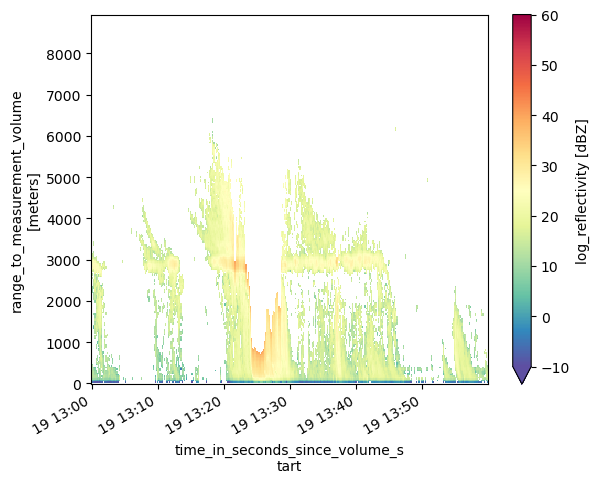

In [164]:
ds["Z"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60)

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(0.0, 3000.0)

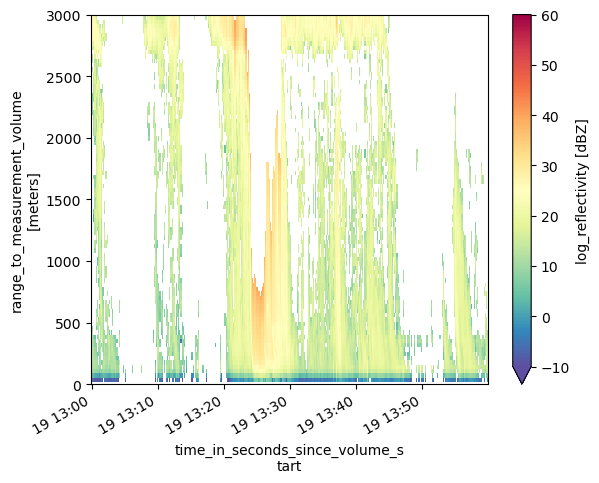

In [165]:
ds["Z"].sel(time=slice('2023-05-19T12:00:00', '2023-05-19T15:00:00')).T.plot(
    cmap='Spectral_r', vmin=-10, vmax=60)
plt.ylim([0, 3000]) 

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


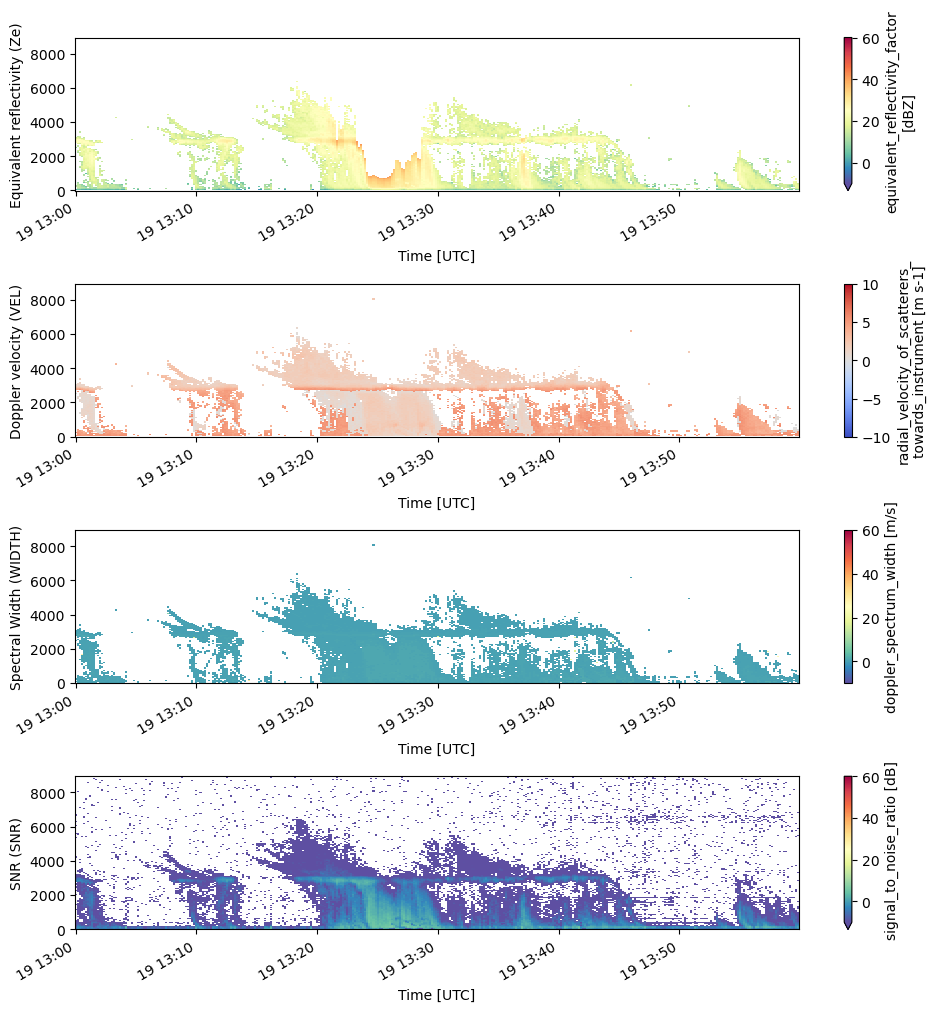

In [61]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Ze"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[0])
ax[0].set_xlabel('Time [UTC]'), ax[0].set_ylabel('Equivalent reflectivity (Ze)')
ds["VEL"].T.plot(cmap='coolwarm', vmin=-10, vmax=10, ax=ax[1])
ax[1].set_xlabel('Time [UTC]'), ax[1].set_ylabel('Doppler velocity (VEL)')
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[2])
ax[2].set_xlabel('Time [UTC]'), ax[2].set_ylabel('Spectral Width (WIDTH)')
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]'), ax[3].set_ylabel('SNR (SNR)')
ds.to_netcdf('MRR 20230519.nc')
fig.tight_layout()

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


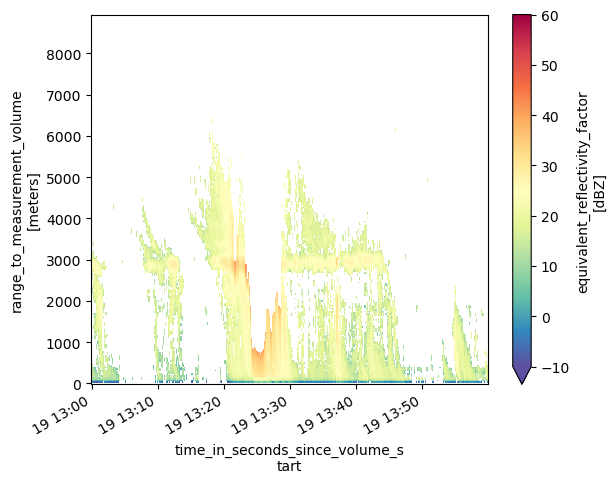

In [166]:
ds["Ze"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60)

In [167]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/ERUO-main/examples/Postproc_files/2023/Subset/ERUO_subset-mrr_postprocessed.nc')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [168]:
ds

<xarray.Dataset>
Dimensions:      (time: 360, range: 256)
Coordinates:
  * range        (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time         (time) datetime64[ns] 2023-05-19T13:00:00.006561024 ... 2023...
    elevation    (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth      (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Data variables:
    Zea          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    VEL          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    WIDTH        (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_level  (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_floor  (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO - Po...
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 20/06/2023 19:27:15 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Zea,VEL,WIDTH,SNR,noise_level,noise_floor

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


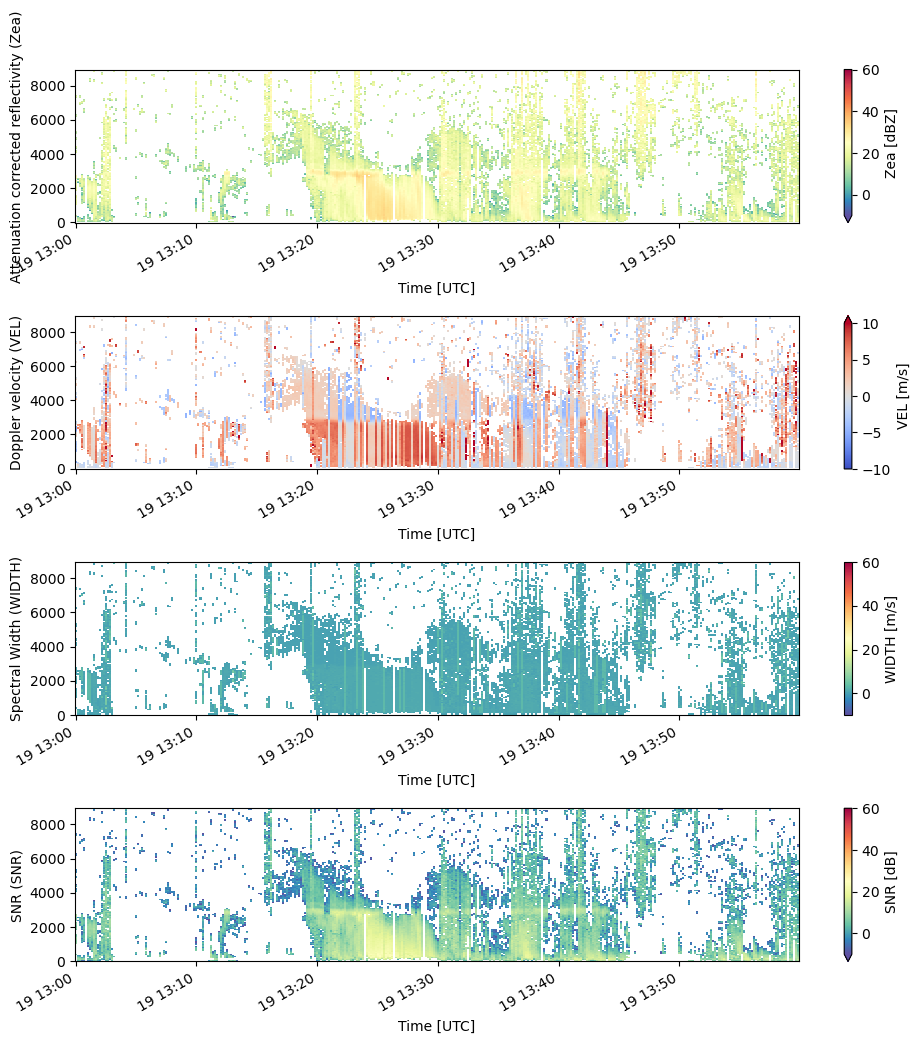

In [90]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[0])
ax[0].set_xlabel('Time [UTC]'), ax[0].set_ylabel('Attenuation corrected reflectivity (Zea)')
ds["VEL"].T.plot(cmap='coolwarm', vmin=-10, vmax=10, ax=ax[1])
ax[1].set_xlabel('Time [UTC]'), ax[1].set_ylabel('Doppler velocity (VEL)')
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[2])
ax[2].set_xlabel('Time [UTC]'), ax[2].set_ylabel('Spectral Width (WIDTH)')
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]'), ax[3].set_ylabel('SNR (SNR)')
ds.to_netcdf('MRR 20230519_updated.nc')
fig.tight_layout()

In [169]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/ERUO-main/examples/Proc_files/2023/Subset/ERUO_subset-mrr.nc')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


In [170]:
ds

<xarray.Dataset>
Dimensions:                       (time: 360, range: 256, spectrum_n_samples_extended: 96, spectrum_n_samples: 32)
Coordinates:
  * range                         (range) float32 0.0 35.0 ... 8.925e+03
  * time                          (time) datetime64[ns] 2023-05-19T13:00:00.0...
    azimuth                       (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    elevation                     (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: spectrum_n_samples_extended, spectrum_n_samples
Data variables:
    spectrum_reflectivity         (time, range, spectrum_n_samples_extended) float64 dask.array<chunksize=(360, 256, 96), meta=np.ndarray>
    Zea                           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    VEL                           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    WIDTH                         (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_level                   (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_floor                   (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    flag_spectrum_reconstruction  (time, range, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 20/06/2023 19:23:10 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      spectrum_reflectivity,Zea,VEL,WIDTH,SNR,noise_level,noi...

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

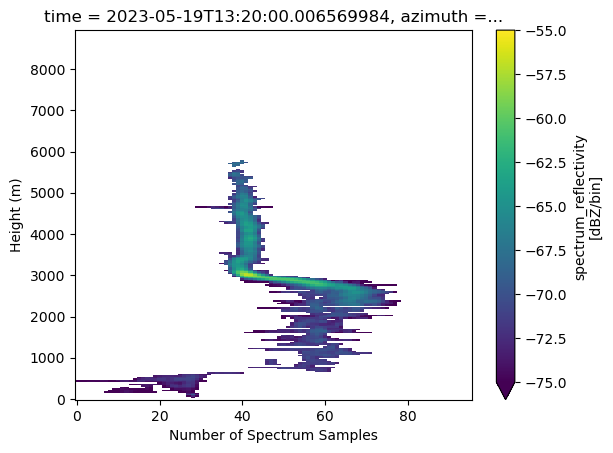

In [171]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:00').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

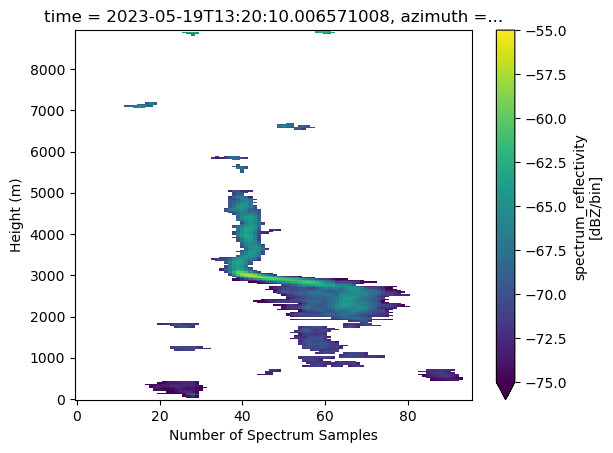

In [172]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:10').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

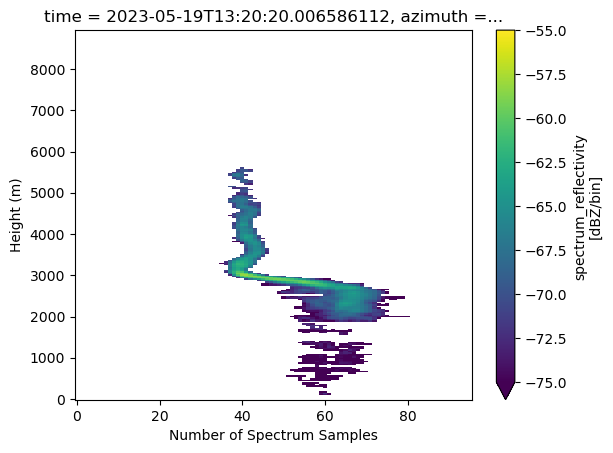

In [173]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:20').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

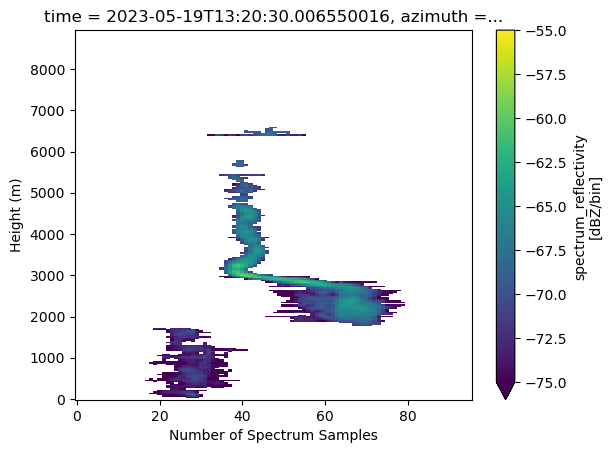

In [174]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:30').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

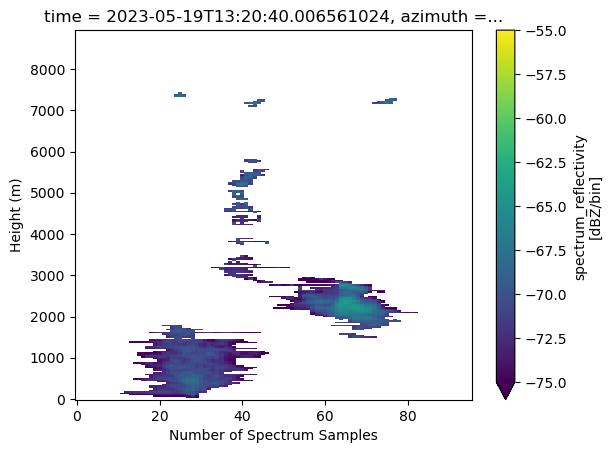

In [175]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:40').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

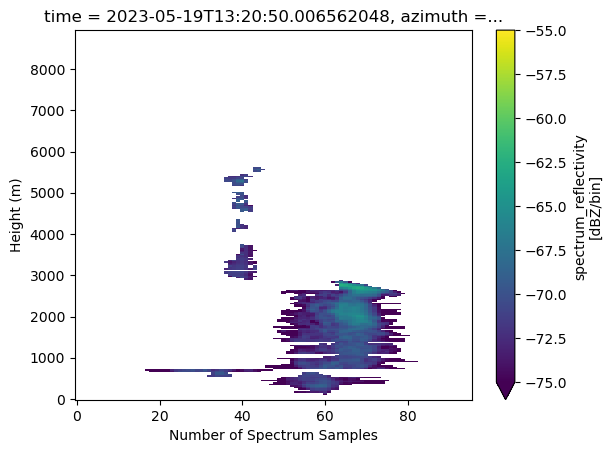

In [176]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:20:50').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

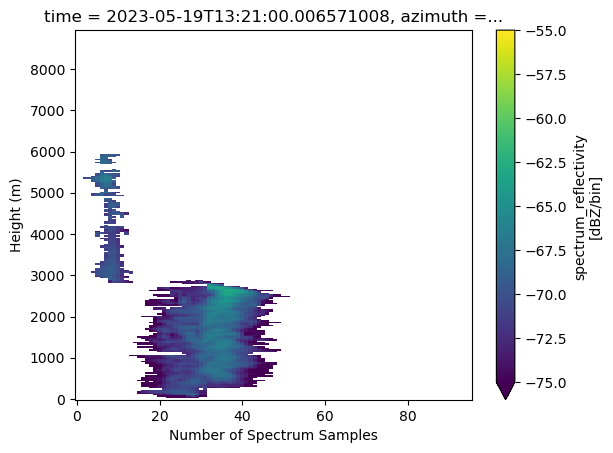

In [177]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:00').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

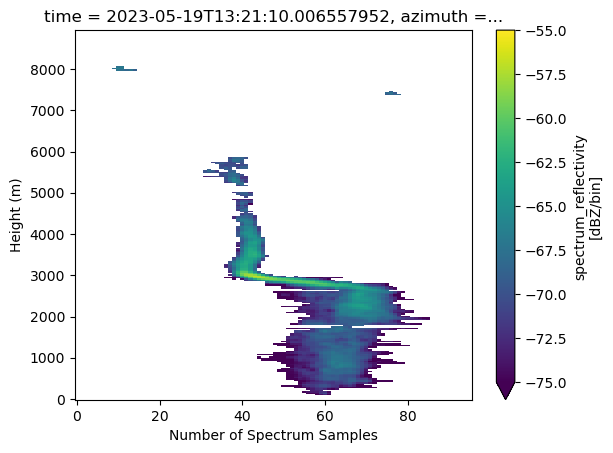

In [178]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:10').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

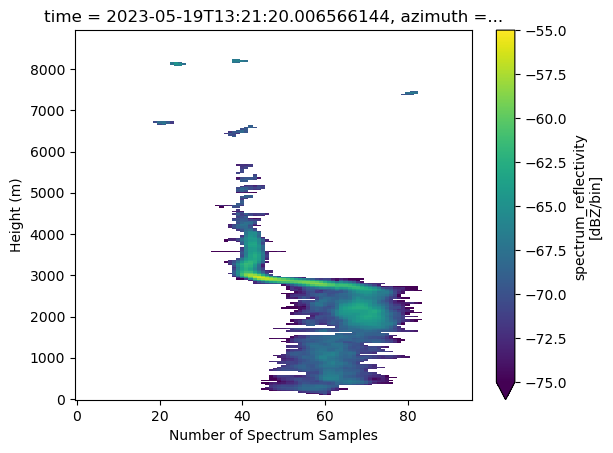

In [179]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:20').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

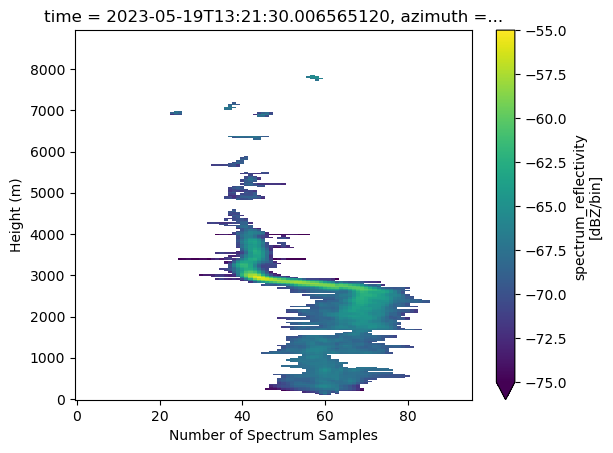

In [180]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:30').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

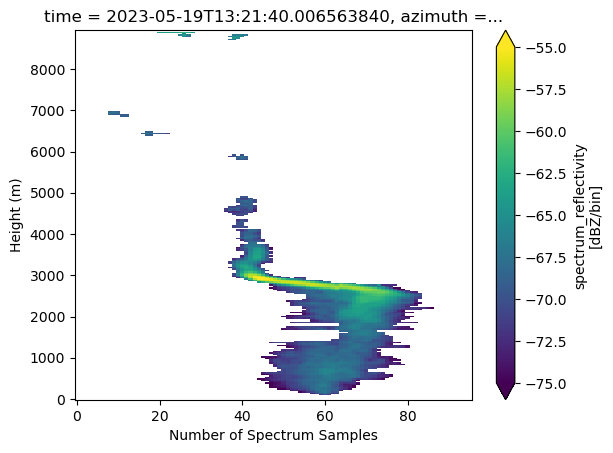

In [181]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:40').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

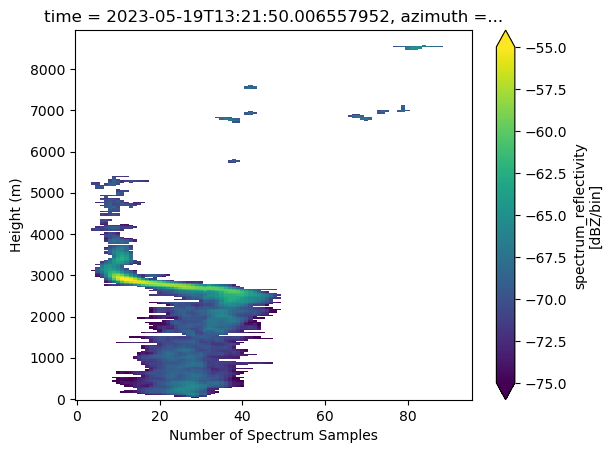

In [182]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:21:50').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


(Text(0.5, 0, 'Number of Spectrum Samples'), Text(0, 0.5, 'Height (m)'))

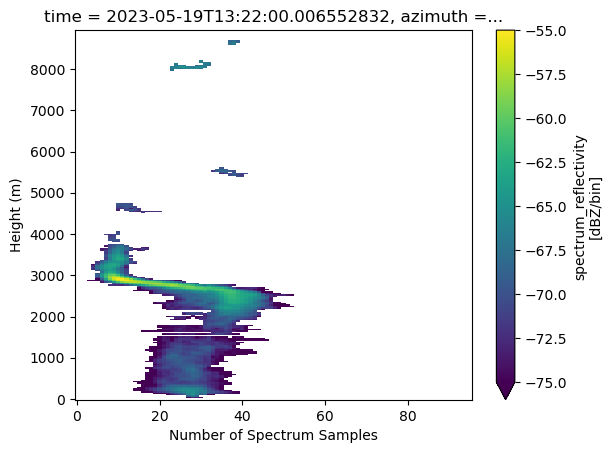

In [183]:
ds['spectrum_reflectivity'].sel(time='2023-05-19T13:22:00').plot(vmin=-75, vmax=-55)
plt.xlabel('Number of Spectrum Samples'), plt.ylabel('Height (m)')

/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/adamabdelhak/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


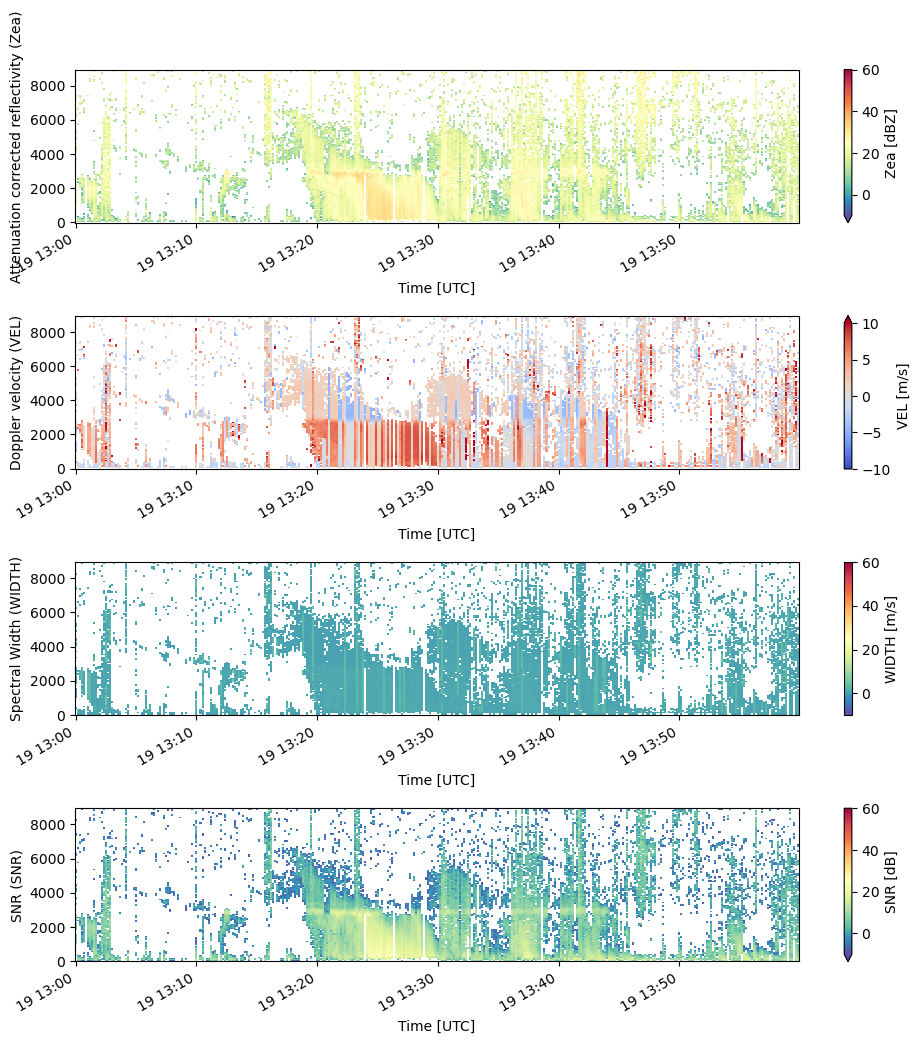

In [184]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[0])
ax[0].set_xlabel('Time [UTC]'), ax[0].set_ylabel('Attenuation corrected reflectivity (Zea)')
ds["VEL"].T.plot(cmap='coolwarm', vmin=-10, vmax=10, ax=ax[1])
ax[1].set_xlabel('Time [UTC]'), ax[1].set_ylabel('Doppler velocity (VEL)')
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[2])
ax[2].set_xlabel('Time [UTC]'), ax[2].set_ylabel('Spectral Width (WIDTH)')
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]'), ax[3].set_ylabel('SNR (SNR)')
fig.tight_layout()